## CREDIT CARD FRAUD DETECTION

### IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score

### READING THE DATASET

In [2]:
df_train = pd.read_csv('/home/u206156/Internship/Credit Card Fraud Detection/fraudTrain.csv')

In [3]:
df_test = pd.read_csv('/home/u206156/Internship/Credit Card Fraud Detection/fraudTest.csv')

In [4]:
df = pd.concat([df_train, df_test])

### EXPLORATORY DATA ANALYSIS

In [5]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df_train.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [7]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [8]:
df_test.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [10]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [11]:
df.shape

(1852394, 23)

In [12]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [13]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

### DATA VISUALIZATION

#### BAR PLOT

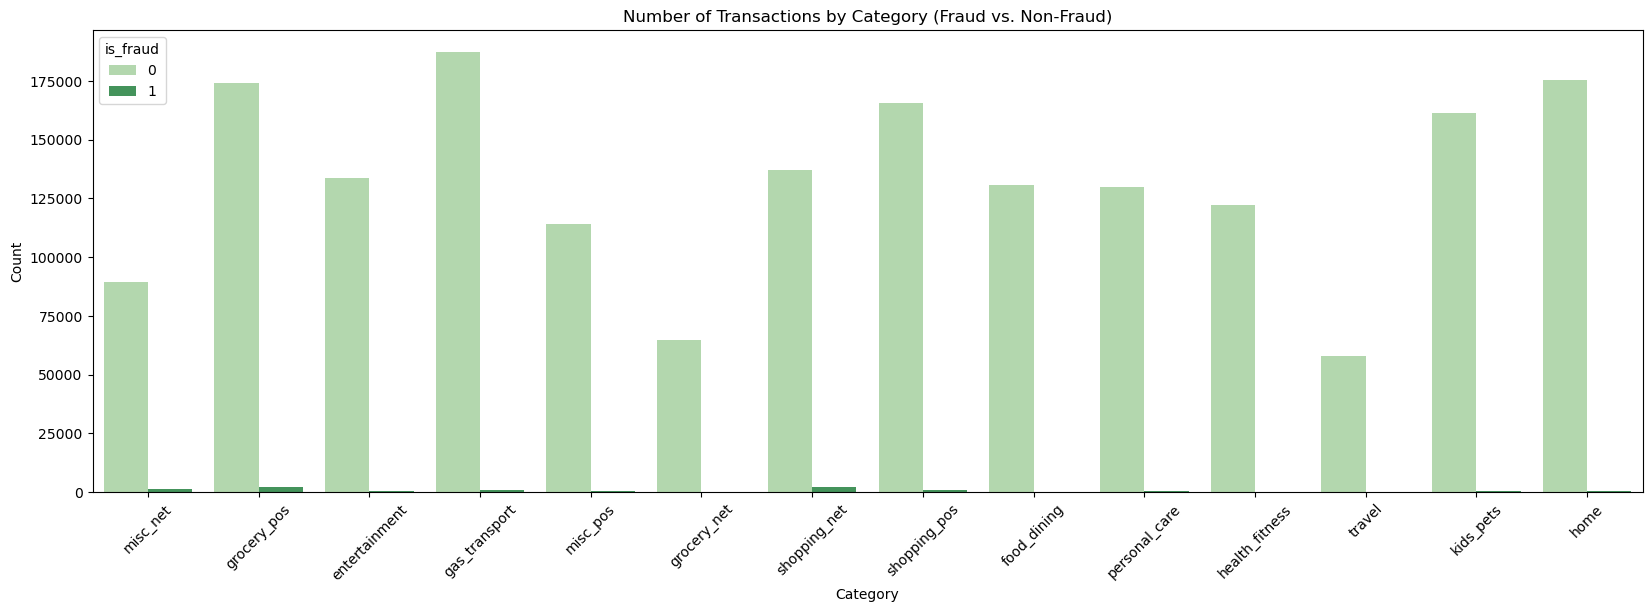

In [14]:
plt.figure(figsize=(20, 6))
sns.countplot(x='category', hue='is_fraud', data=df, palette='Greens')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Transactions by Category (Fraud vs. Non-Fraud)')
plt.show()

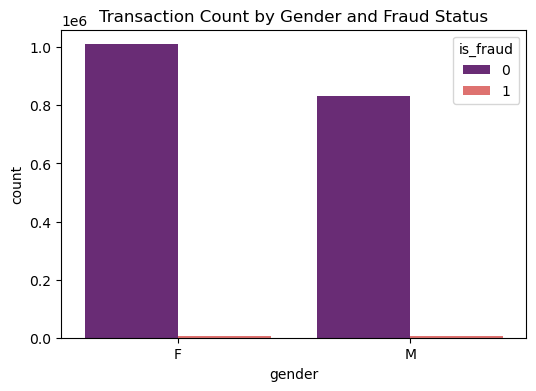

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, hue='is_fraud', palette='magma')
plt.title('Transaction Count by Gender and Fraud Status')
plt.show()

#### SCATTERPLOT

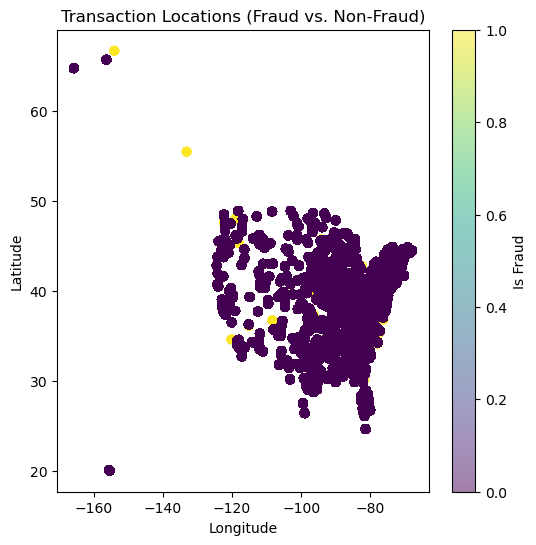

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(df['long'], df['lat'], alpha=0.5, c=df['is_fraud'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Transaction Locations (Fraud vs. Non-Fraud)')
plt.colorbar(label='Is Fraud')
plt.show()

#### PIE CHART

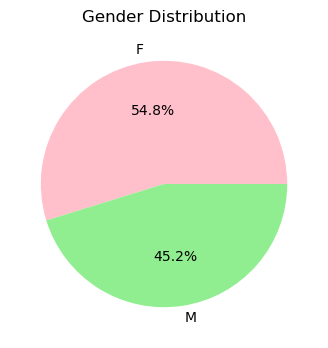

In [17]:
plt.figure(figsize=(4,4))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightgreen'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

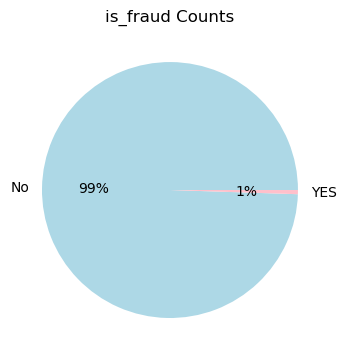

In [18]:
exit_counts = df["is_fraud"].value_counts()
plt.figure(figsize=(7,7))
plt.subplot(1, 2, 1) 
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%",colors=['lightblue','pink'])
plt.title("is_fraud Counts")
plt.tight_layout() 
plt.show()

#### PAIRPLOT

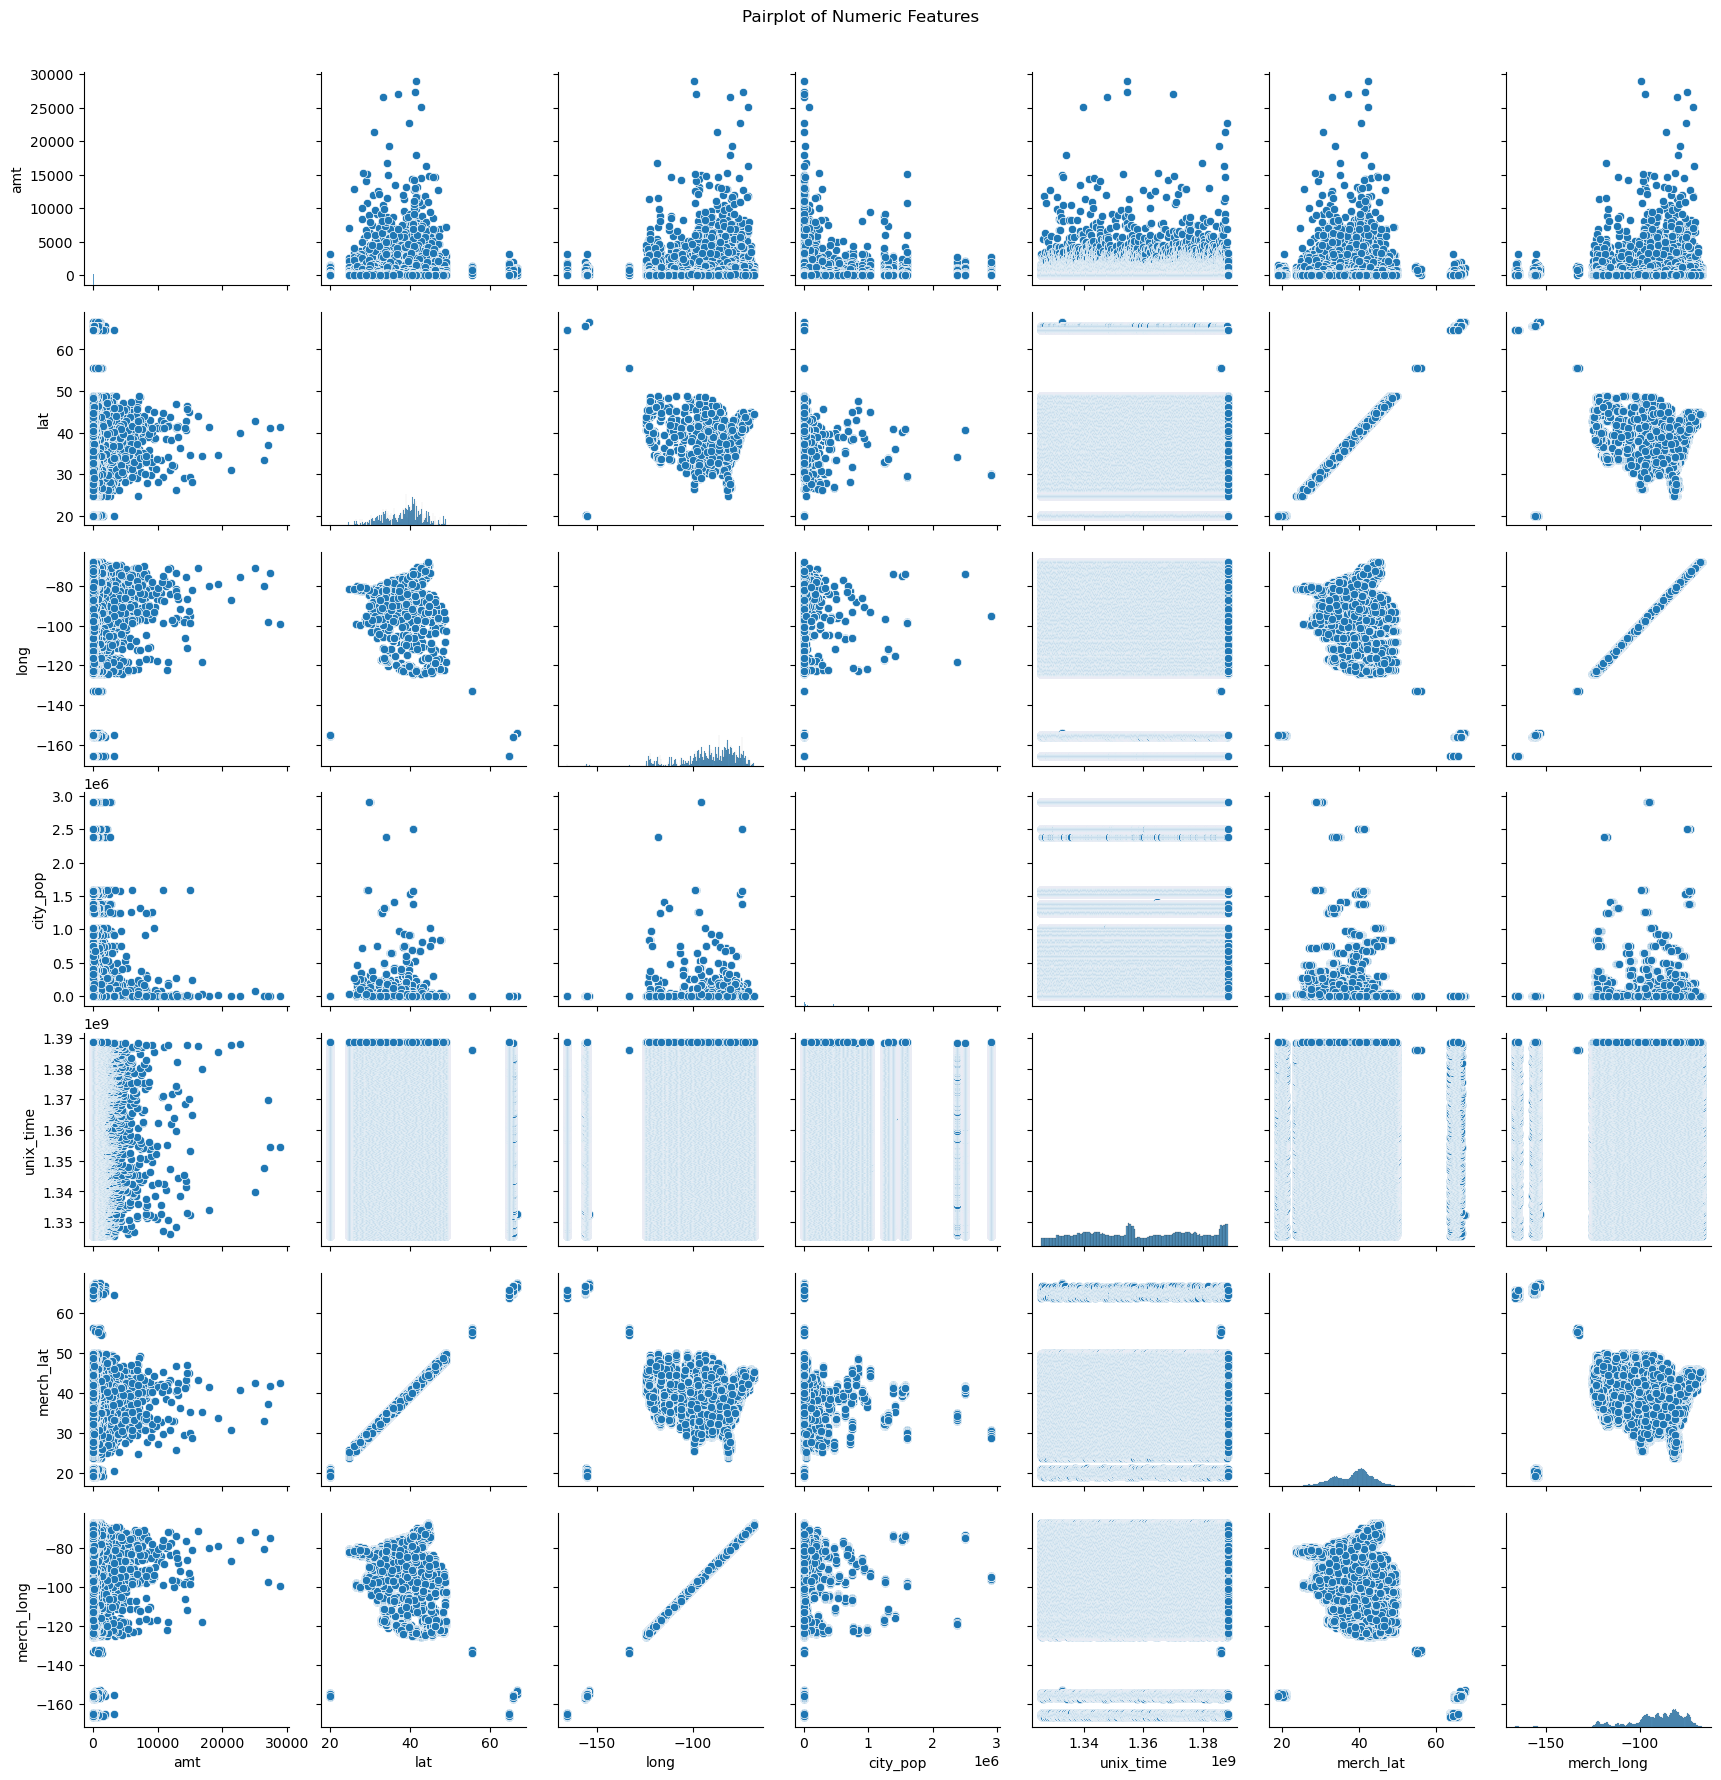

In [19]:
numeric_features = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
sns.pairplot(df[numeric_features])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

#### HEATMAP

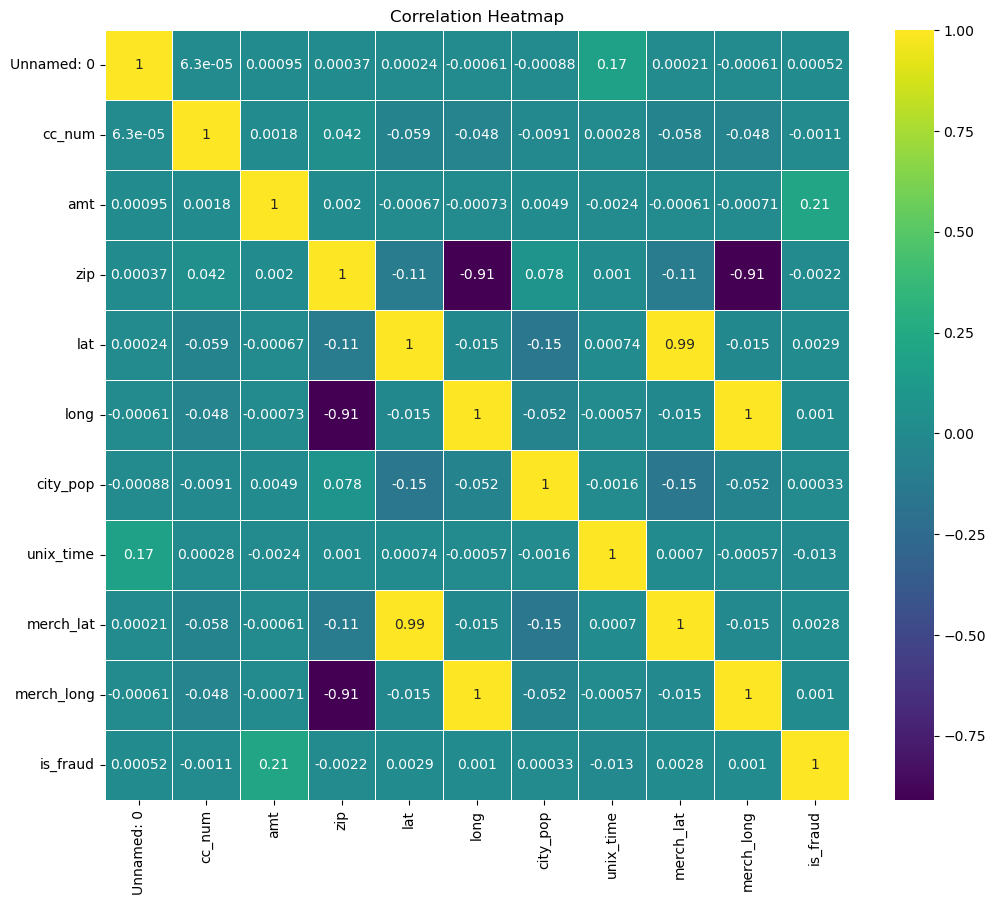

In [20]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### DATA ENCODING

In [21]:
label_encoders = {}

In [22]:
label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le
    
    df_test[col] = le.fit_transform(df_test[col])
    label_encoders[col] = le

### TRANSFORMING THE FEATURES

#### FOR COMBINED DATA

In [23]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [24]:
df['transaction_year'] = df['trans_date_trans_time'].dt.year
df['transaction_month'] = df['trans_date_trans_time'].dt.month
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour

In [25]:
df['birth_year'] = df['dob'].dt.year
df['birth_month'] = df['dob'].dt.month
df['birth_day'] = df['dob'].dt.day

In [26]:
df.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

#### FOR TRAIN DATA

In [27]:
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train['dob'] = pd.to_datetime(df_train['dob'])

In [28]:
df_train['transaction_year'] = df_train['trans_date_trans_time'].dt.year
df_train['transaction_month'] = df_train['trans_date_trans_time'].dt.month
df_train['transaction_day'] = df_train['trans_date_trans_time'].dt.day
df_train['transaction_hour'] = df_train['trans_date_trans_time'].dt.hour

In [29]:
df_train['birth_year'] = df_train['dob'].dt.year
df_train['birth_month'] = df_train['dob'].dt.month
df_train['birth_day'] = df_train['dob'].dt.day

In [30]:
df_train.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

#### FOR TEST DATA

In [31]:
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['dob'] = pd.to_datetime(df_test['dob'])

In [32]:
df_test['transaction_year'] = df_test['trans_date_trans_time'].dt.year
df_test['transaction_month'] = df_test['trans_date_trans_time'].dt.month
df_test['transaction_day'] = df_test['trans_date_trans_time'].dt.day
df_test['transaction_hour'] = df_test['trans_date_trans_time'].dt.hour

In [33]:
df_test['birth_year'] = df_test['dob'].dt.year
df_test['birth_month'] = df_test['dob'].dt.month
df_test['birth_day'] = df_test['dob'].dt.day

In [34]:
df_test.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [35]:
df.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
df_train.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
df_test.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

### SPLITING DATASET FOR TEST AND TRAIN

In [36]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LOGISTIC REGRESSION

In [38]:
lr_mod = LogisticRegression(max_iter=1000)
lr_mod.fit(X_train, y_train)

/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [39]:
lr_pre = lr_mod.predict(X_test)
print(classification_report(y_test, lr_pre))

/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



/glob/development-tools/versions/oneapi/2024.0.2.1/oneapi/intelpython/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### DECISION TREE CLASSIFIER 

In [40]:
dec_tree_mod = DecisionTreeClassifier()
dec_tree_mod.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
dtc_pre = dec_tree_mod.predict(X_test)
print(classification_report(y_test, dtc_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.80      0.84      0.82      1953

    accuracy                           1.00    370479
   macro avg       0.90      0.92      0.91    370479
weighted avg       1.00      1.00      1.00    370479



### RANDOM FOREST CLASSIFIER

In [42]:
ran_forest_mod = RandomForestClassifier()
ran_forest_mod.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
rfc_pre = ran_forest_mod.predict(X_test)
print(classification_report(y_test, rfc_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.98      0.74      0.84      1953

    accuracy                           1.00    370479
   macro avg       0.99      0.87      0.92    370479
weighted avg       1.00      1.00      1.00    370479



### CONFUSION MATRIX

In [44]:
lr_cm = confusion_matrix(y_test, lr_pre)

In [45]:
print("Confusion Matrix for the Logistic Regression")
print(lr_cm)

Confusion Matrix for the Logistic Regression
[[368526      0]
 [  1953      0]]


In [46]:
dt_cm = confusion_matrix(y_test, dtc_pre)

In [47]:
print("Confusion Matrix for the Decision Tree")
print(dt_cm)

Confusion Matrix for the Decision Tree
[[368107    419]
 [   309   1644]]


In [48]:
rf_cm = confusion_matrix(y_test, rfc_pre)

In [49]:
print("Confusion Matrix for the Random Forest")
print(rf_cm)

Confusion Matrix for the Random Forest
[[368499     27]
 [   507   1446]]


### VISUALIZATION OF CONFUSION MATRIX

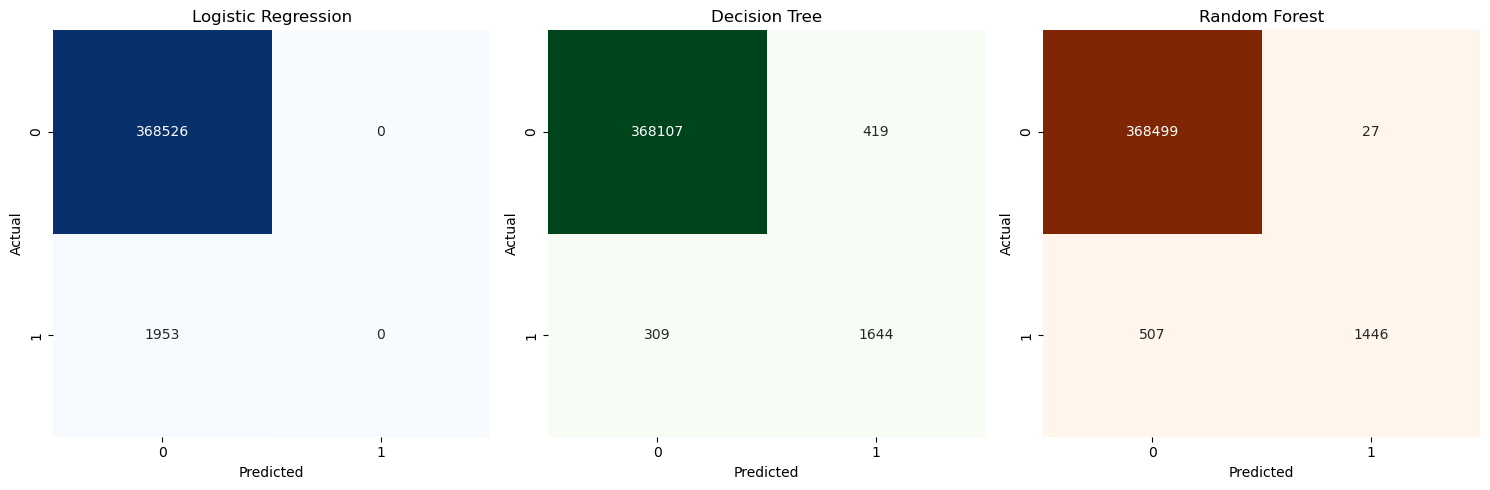

In [50]:
colors = ["Blues", "Greens", "Oranges"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(lr_cm, annot=True, fmt="d", cmap=colors[0], cbar=False, ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(dt_cm, annot=True, fmt="d", cmap=colors[1], cbar=False, ax=axes[1])
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(rf_cm, annot=True, fmt="d", cmap=colors[2], cbar=False, ax=axes[2])
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### COMPARING THE ACCURACIES OF MODELS

In [51]:
lr_acc = accuracy_score(y_test, lr_pre)
dtc_acc = accuracy_score(y_test, dtc_pre)
rfc_acc = accuracy_score(y_test, rfc_pre)

In [52]:
print("Logistic Regression Accuracy:", lr_acc)
print("Decision Tree Classifier Accuracy:", dtc_acc)
print("Random Forest Classifier Accuracy:", rfc_acc)

Logistic Regression Accuracy: 0.9947284461467452
Decision Tree Classifier Accuracy: 0.998034976341439
Random Forest Classifier Accuracy: 0.9985586227559456


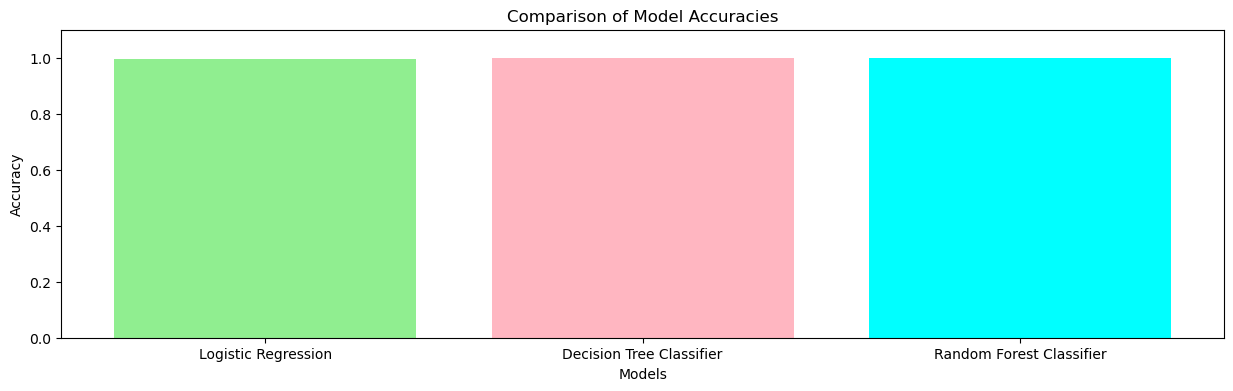

In [53]:
accs = [lr_acc, dtc_acc, rfc_acc]
mods = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier']
plt.figure(figsize=(15, 4))
plt.bar(mods, accs, color=['lightgreen', 'lightpink', 'cyan'])
plt.ylim(0, 1.1) 
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()